image.png

In [ ]:
#We have to build the time series model and perform the required visualisations .Rather than using ARima,sarimax we have to build the Facebook time series model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px    #plotly is another visualisation library
import plotly.graph_objects as go
   #it is a facebook library

In [ ]:
!pip install --upgrade plotly

In [ ]:
data=pd.read_csv('/content/covid_19_clean_complete (4).csv')

<ipython-input-16-cd00f748f3f1>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/covid_19_clean_complete (4).csv')


In [ ]:
data.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22        0.0   
1            NaN        Albania  41.15330  20.168300  2020-01-22        0.0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22        0.0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22        0.0   
4            NaN         Angola -11.20270  17.873900  2020-01-22        0.0   

   Deaths  Recovered Active             WHO Region  
0     0.0        0.0      0  Eastern Mediterranean  
1     0.0        0.0      0                 Europe  
2     0.0        0.0      0                 Africa  
3     0.0        0.0      0                 Europe  
4     0.0        0.0      0                 Africa

In [ ]:
data.shape

(81622, 10)

In [ ]:
#For the entire world  and different countires

In [ ]:
#7 months data is given to us for the entire world and we have to analyse those data and gather the insights from those data

In [ ]:
#Who region tells this country belongs where

In [ ]:
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [ ]:
data['Active']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
81617     117.0
81618     375.0
81619      19.0
81620    1147.0
81621     365.0
Name: Active, Length: 81622, dtype: float64

In [ ]:
data

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
81617            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
81618            NaN                  Yemen  15.552727  48.516388  2020-07-27   
81619            NaN                Comoros -11.645500  43.333300  2020-07-27   
81620            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
81621            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0            0.0     0.0        0.0     0.0  Eastern Mediterranean  
1            0.0     0.0        0.0     0.0                 Europe  
2            0.0     0.0        0.0     0.0                 Africa  
3            0.0     0.0        0.0     0.0                 Europe  
4            0.0     0.0        0.0     0.0                 Africa  
...          ...     ...        ...     ...                    ...  
81617      865.0    14.0      734.0   117.0                 Africa  
81618     1691.0   483.0      833.0   375.0  Eastern Mediterranean  
81619      354.0     7.0      328.0    19.0                 Africa  
81620     7235.0    60.0     6028.0  1147.0                 Europe  
81621      505.0    12.0      128.0   365.0                 Africa  

[81622 rows x 10 columns]

In [ ]:
data[data['Date']=='2020-07-27']           #How many customer sborn in 27th July 2020

Province/State         Country/Region        Lat       Long        Date  \
64183            NaN            Afghanistan  33.939110  67.709953  2020-07-27   
64184            NaN                Albania  41.153300  20.168300  2020-07-27   
64185            NaN                Algeria  28.033900   1.659600  2020-07-27   
64186            NaN                Andorra  42.506300   1.521800  2020-07-27   
64187            NaN                 Angola -11.202700  17.873900  2020-07-27   
...              ...                    ...        ...        ...         ...   
81617            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
81618            NaN                  Yemen  15.552727  48.516388  2020-07-27   
81619            NaN                Comoros -11.645500  43.333300  2020-07-27   
81620            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
81621            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
64183    36263.0  1269.0    25198.0  9796.0  Eastern Mediterranean  
64184     4880.0   144.0     2745.0  1991.0                 Europe  
64185    27973.0  1163.0    18837.0  7973.0                 Africa  
64186      907.0    52.0      803.0    52.0                 Europe  
64187      950.0    41.0      242.0   667.0                 Africa  
...          ...     ...        ...     ...                    ...  
81617      865.0    14.0      734.0   117.0                 Africa  
81618     1691.0   483.0      833.0   375.0  Eastern Mediterranean  
81619      354.0     7.0      328.0    19.0                 Africa  
81620     7235.0    60.0     6028.0  1147.0                 Europe  
81621      505.0    12.0      128.0   365.0                 Africa  

[522 rows x 10 columns]

In [ ]:
top=data[data['Date']==data['Date'].max()]

TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
top

In [ ]:
data.drop(columns=['Province/State'],inplace=True)

In [ ]:
data

In [ ]:
#we can say that latitude is 1.15 and logintude is 1.6

In [ ]:
w=data.groupby('Country/Region')[['Confirmed','Active','Deaths','Recovered']].sum().reset_index()

In [ ]:
w

In [ ]:
#if I don't write reset_index then it will become a index and with the help of reset_index it would become a column over here

In [ ]:
fig=px.choropleth(w,locations='Country/Region',locationmode='country names',color='Active',hover_name='Country/Region',range_color=(1,1500),color_continuous_scale="Peach",title="Active Cases by Country")
fig.show()

In [ ]:
#wherever the active cases are more the intensity is darket as compared to those where the intensity is lighterWe decide wth the help of range bar

In [ ]:
#location specifies the column with the country names in the map it specifies it is India,it is Cannada,it is Ruusia

In [ ]:
#cloropleth is a map in plotly library which is used to create the map kind of thing

In [ ]:
#we have to fetch the data fom country column

In [ ]:
#from this I will get the unique 157 countries from which records is present

In [ ]:
# color is the total number of active cases

In [ ]:
#hover_name will specify the county names when i will take my cursor to it

In [ ]:
#range color is the range of values for the color scale I have higher value darker is the intensity,lower value is lighter is the intensity

In [ ]:
#color_continous scale which  uses difeerent colors on the basis of scale values

In [ ]:
#At the end just the display of the map using fig.show()

In [ ]:
fig=px.choropleth(w,locations='Country/Region',locationmode='country names',color='Deaths',hover_name='Country/Region',range_color=(1,1500),color_continuous_scale="Peach",title=" Death Cases by Country")
fig.show()

In [ ]:
fig=px.choropleth(w,locations='Country/Region',locationmode='country names',color='Confirmed',hover_name='Country/Region',range_color=(1,1500),color_continuous_scale="Peach",title="Confirmed Cases by Country")
fig.show()

In [ ]:
fig=px.choropleth(w,locations='Country/Region',locationmode='country names',color='Recovered',hover_name='Country/Region',range_color=(1,1500),color_continuous_scale="Peach",title="Recovered Cases by Country")
fig.show()

In [ ]:
#Now we want to plot the graph from 20 Jan to 27th July we have to plot the graphs for that

In [ ]:
t_cases=data.groupby('Date')["Confirmed"].sum().reset_index()
t_cases

In [ ]:
#plot for confirmed cases

plt.figure(figsize=(15,10))
t_cases=data.groupby("Date")["Confirmed"].sum().reset_index()
t_cases['Date']=pd.to_datetime(t_cases['Date'])
a=sns.pointplot(x=t_cases.Date.dt.date,y=t_cases.Confirmed,color='r')  #pointplot is like line plot istead of getting line we get points
a.set(xlabel="Dates",ylabel="Cases total")

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [ ]:
#we can see it is rapidly increasing with time

**#Top 20 countries which are having the most number of active cases**

In [ ]:
t_actives=data.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
t_actives

In [ ]:
plt.figure(figsize=(15,10))                  #width as 15 and height as 10

In [ ]:
plt.title("Top 20 countries having most active cases")
sns.barplot(x=t_actives['Country/Region'],y=t_actives['Active'])
plt.xticks(rotation=90,fontsize=10)

In [ ]:
#xticks rotates the label in the x axis to a certain angle

#Top 20 Countries having highest number of deaths

In [ ]:
t_deaths=data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
t_deaths

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Top 20 countries having most active cases")
sns.barplot(x=t_deaths['Country/Region'],y=t_deaths['Deaths'])
plt.xticks(rotation=90,fontsize=10)

In [ ]:
Brazil=data[data['Country/Region']=='Brazil']
Brazil=Brazil.groupby(by="Date")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

In [ ]:
Brazil

In [ ]:
US=data[data['Country/Region']=='US']
US=US.groupby(by="Date")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

In [ ]:
US

In [ ]:
Russia=data[data['Country/Region']=='Russia']
Russia=Russia.groupby(by="Date")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

In [ ]:
Russia

In [ ]:
India=data[data['Country/Region']=='India']
India=India.groupby(by="Date")[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

In [ ]:
India

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(data=Brazil,x=Brazil.Date,y=Brazil.Confirmed,color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.Date,y=US.Confirmed,color='red',label='US')
sns.pointplot(data=Russia,x=Russia.Date,y=Russia.Confirmed,color='green',label='Russia')
sns.pointplot(data=India,x=India.Date,y=India.Confirmed,color='yellow',label='India')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=10)
plt.ylabel('Cases total',fontsize=30)



1.   From the above plot we can conclude that US has the most number of confirmed cases followed by Brazil and India whereas Russia has the least number of confirmed cases




In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(data=Brazil,x=Brazil.Date,y=Brazil.Deaths,color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.Date,y=US.Deaths,color='red',label='US')
sns.pointplot(data=Russia,x=Russia.Date,y=Russia.Deaths,color='green',label='Russia')
sns.pointplot(data=India,x=India.Date,y=India.Deaths,color='yellow',label='India')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=10)
plt.ylabel('Cases total',fontsize=30)
plt.xticks(rotation=90,fontsize=5)
plt.title("Death cases over time",fontsize=30)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

From the above plot we can conclude that US has the most number of death cases followed by Brazil and India whereas Russia has the least number of deaths cases

In [ ]:
#top 20 recovered and confirmed cases

In [ ]:
#compare the confirmed and recovered data for Brazil ,US,Russia and India

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(data=Brazil,x=Brazil.Date,y=Brazil.Recovered,color="Blue",label="Brazil")
sns.pointplot(data=US,x=US.Date,y=US.Recovered,color='red',label='US')
sns.pointplot(data=Russia,x=Russia.Date,y=Russia.Recovered,color='green',label='Russia')
sns.pointplot(data=India,x=India.Date,y=India.Recovered,color='yellow',label='India')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=10)
plt.ylabel('Cases total',fontsize=30)
plt.xticks(rotation=90,fontsize=5)
plt.title("Death cases over time",fontsize=30)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

In [ ]:
#top 20 countries with recovered and confirmed cases
#compare the active and recovered data for Brazil,uS,Russia,India

**Forecasting using FBPROPHET**

In [ ]:
#Predicting the future on the basis of past data

In [ ]:
#how the data can vary in the upcoming future.Doordarshann telecast the weather for the upcoming week,predicting the future on the basis of past data

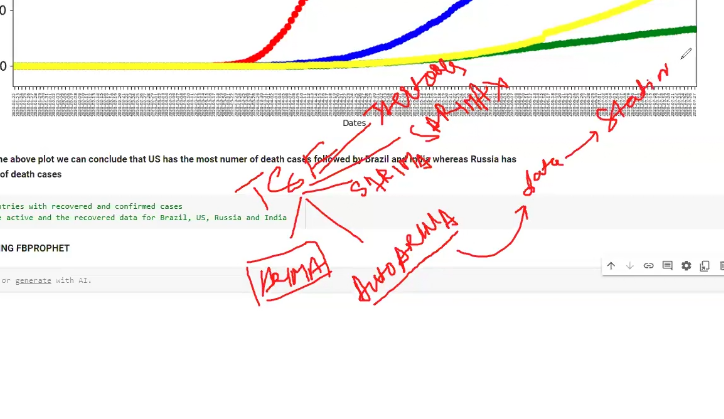

In [ ]:
#data is stationary when the mean and standard deviation remains constant with respect to time

In [ ]:
#fb prophet library is beautiful library for forecasting the data without checking the stationariy of data

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data.head()

In [ ]:
data.groupby("Date").sum().head()

In [ ]:
total_active=data['Active'].sum()
print("Total number of active covid 19 cases",total_active)


In [ ]:
confirmed=data.groupby("Date")['Confirmed'].sum().reset_index()

In [ ]:
confirmed

In [ ]:
death=data.groupby("Date")['Deaths'].sum().reset_index()

In [ ]:
Recovered=data.groupby("Date")['Recovered'].sum().reset_index()

**Forecast on confirmed cases**

In [ ]:
confirmed.columns=["ds","y"]
confirmed["ds"]=pd.to_datetime(confirmed["ds"])
confirmed.head()

In [ ]:
confirmed

In [ ]:
#if p- value falls under this region that is 0.05 we reject the hypothesis while if it falls under 95% .It falls under acceptance region

In [ ]:
m=Prophet(interval_width=0.95)  #with%% we are taking the error margin
m.fit(confirmed)

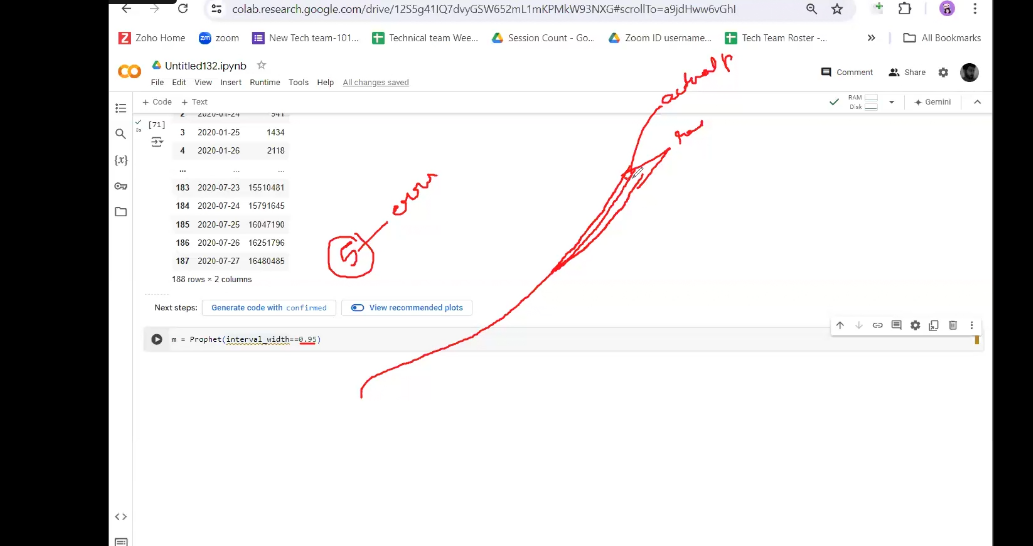

In [ ]:
#actual prediction! and predicted value

In [ ]:
future=m.make_future_dataframe(periods=7,freq="D")
future.tail()
forecast=m.predict(future)
forecast

In [ ]:
future.tail()

In [ ]:
forecast=m.predict(future)
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(7)

In [ ]:
confirmed_forecast_plot=m.plot(forecast)

In [ ]:
#this is my data of 20th Jan to 27 th July

In [ ]:
#uptill here our data was known to us

In [ ]:
#darker blue line is my actual prediction model has forcasted

In [ ]:
#ANd that is what our yhat lower nad yhat upper is

In [ ]:
#darker blue line is my actual prediction

In [ ]:
#Apart from dark blue line we have some other thing as prediction that is what our yhat upper and yhat lower is

In [ ]:
#blue line is model's answer black dot is actual data

In [ ]:
#Has Any data fallen above or below blue line

In [ ]:
#Somewhat models has given accurate prediction

In [ ]:
#Somewhat model has fluctuated anhen give the actual data

In [ ]:
#This is my actual prediction and my model prediction

image.png

In [ ]:
#y_hat upper is upper boundary and y_hat lower is lower boundary

In [ ]:
#forecast for  the death,active,

In [ ]:
death.columns=['ds','y']
death['ds']=pd.to_datetime(death['ds'])
death

In [ ]:
m=Prophet()

In [ ]:
m.fit(death)

In [ ]:
future=m.make_future_dataframe(periods=7,freq="D")

In [ ]:
future.tail(7)

In [ ]:
forecast=m.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper',]].tail(7)

In [ ]:
death_forecast_plot=m.plot(forecast)

In [ ]:
#top 20 countries with recovered and confirmed cases
#compare the reocovered,confirmed,death cases for brazil and russia
#forecast for active and recovered cases

In [ ]:
#on 20th the confirmed cases can be 1 crore 63 lakhs 20200

In [ ]:
Recovered.columns=['ds','y']
Recovered['ds']=pd.to_datetime(death['ds'])
Recovered

In [ ]:
m=Prophet()

In [ ]:
m.fit(Recovered)

In [ ]:
future=m.make_future_dataframe(periods=7,freq="D")
future.tail()
forecast=m.predict(future)
forecast.head()

In [ ]:
forecast[['ds','yhatlower','yhatupper','yhat']].tail()

In [ ]:
recovered_forecast_plot=m.plot(forecast)